
# **Project Name : ✨ Titanic Dataset ⛴⛴ ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# **Aim Of The Project**

The aim of the Titanic dataset is to analyze and predict passenger survival based on various attributes, such as age, gender, class, and ticket fare, providing insights into factors influencing survival rates in the tragic 1912 shipwreck.

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Normalize Data
from sklearn.preprocessing import StandardScaler

#Conert Categorical to Numerical Value
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
#from sklearn.metrics._plot.roc_curve import auc

# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.shape

(418, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# **Univariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### **Categorical Data**

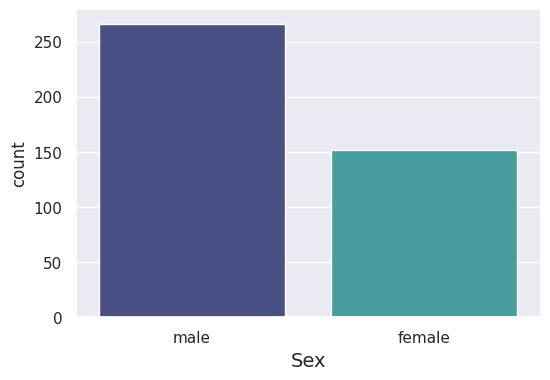

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex' , data=df ,palette='mako')
plt.xlabel('Sex', fontsize=14)
plt.show()

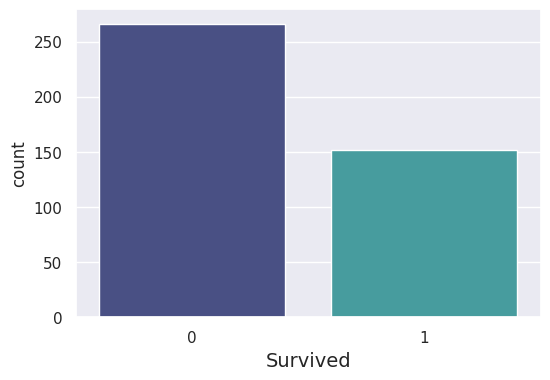

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived' , data=df ,palette='mako')
plt.xlabel('Survived', fontsize=14)
plt.show()

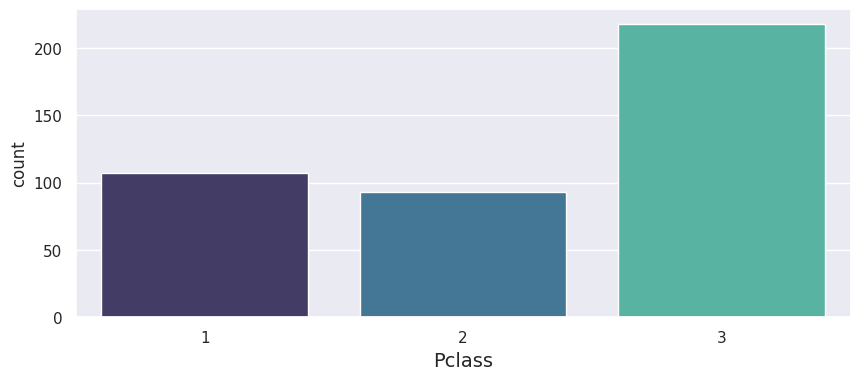

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Pclass' , data=df ,palette='mako')
plt.xlabel('Pclass', fontsize=14)
plt.show()

In [ ]:
df["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

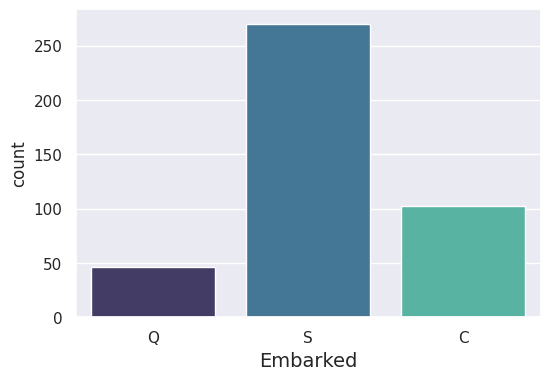

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked' , data=df ,palette='mako')
plt.xlabel('Embarked', fontsize=14)
plt.show()

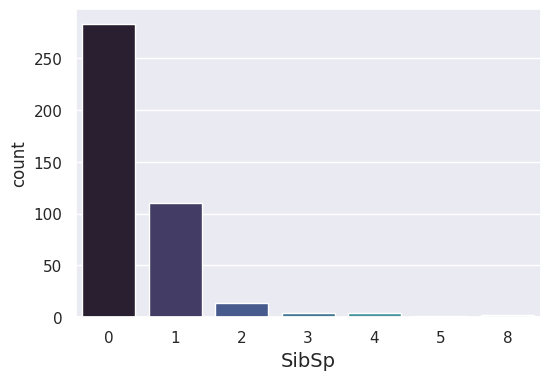

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='SibSp' , data=df ,palette='mako')
plt.xlabel('SibSp', fontsize=14)
plt.show()

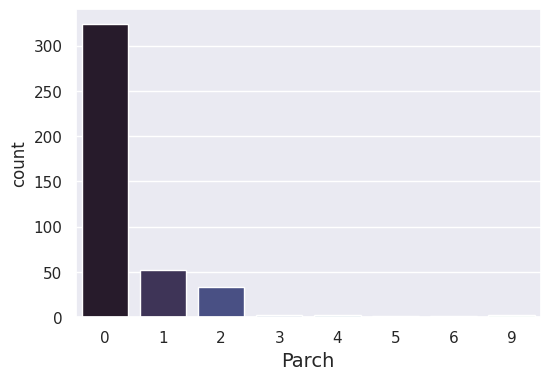

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Parch' , data=df ,palette='mako')
plt.xlabel('Parch', fontsize=14)
plt.show()

#### **Numerical Data**

<ipython-input-104-511f0157ff88>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], kde=True, color="orange", bins=10)


<Axes: xlabel='Age', ylabel='Density'>

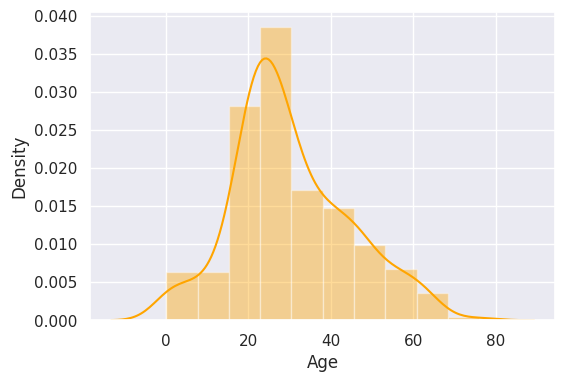

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Age"], kde=True, color="orange", bins=10)

<ipython-input-105-e3c8c8a89367>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PassengerId"], kde=True, color="orange", bins=10)


<Axes: xlabel='PassengerId', ylabel='Density'>

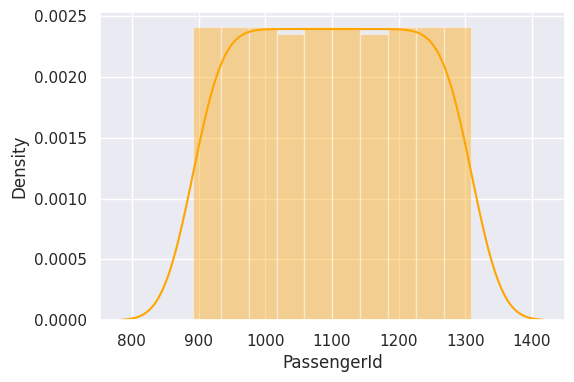

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["PassengerId"], kde=True, color="orange", bins=10)

<ipython-input-106-71ab8e19b3c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"], kde=True, color="orange", bins=10)


<Axes: xlabel='Fare', ylabel='Density'>

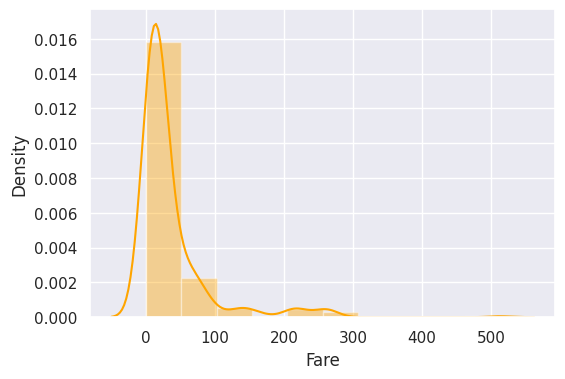

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Fare"], kde=True, color="orange", bins=10)

# **EDA (Exploratory Data Analysis)**

#### **Remove NaN Values**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [ ]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [ ]:
df["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [ ]:
df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### **Removing Outlier**

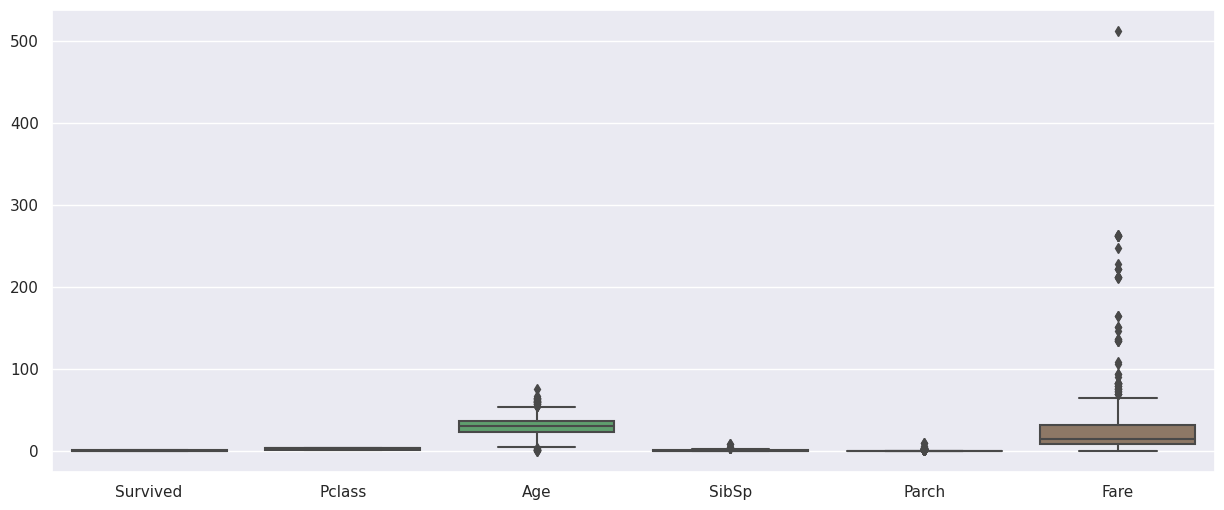

In [ ]:
#Check Outliers
num_cols =df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [ ]:
num_cols.columns.get_loc('Parch')

4

In [ ]:
for i in num_cols.columns:
  if df.columns.get_loc(i) == 5:
    pass
  else:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

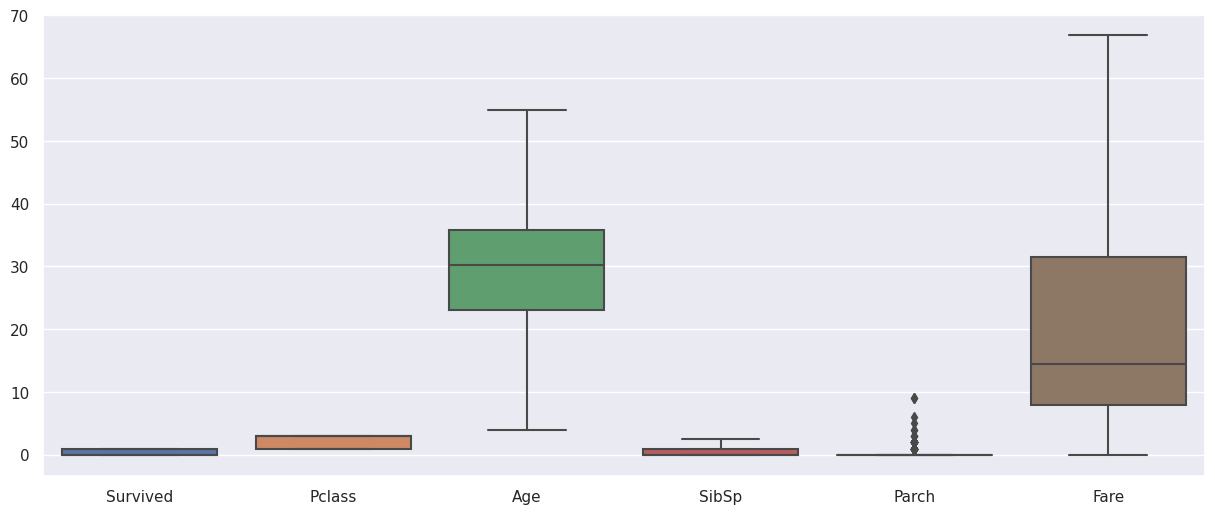

In [ ]:
#Check Outliers
num_cols =df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

In [ ]:
df["Parch"].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

#### **Bivariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    float64
 1   Pclass    418 non-null    float64
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    float64
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 26.2+ KB


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,34.500,0.0,0,7.8292,Q
1,1.0,3.0,female,47.000,1.0,0,7.0000,S
2,0.0,2.0,male,54.875,0.0,0,9.6875,Q
3,0.0,3.0,male,27.000,0.0,0,8.6625,S
4,1.0,3.0,female,22.000,1.0,1,12.2875,S


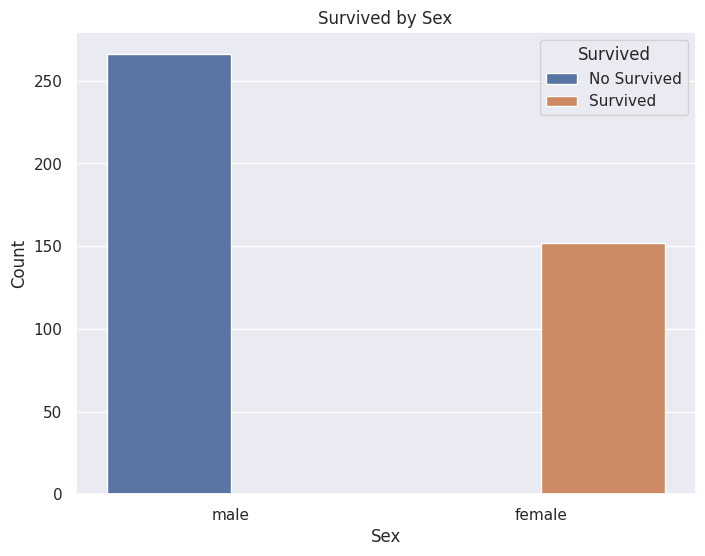

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No Survived', 'Survived'])
plt.show()

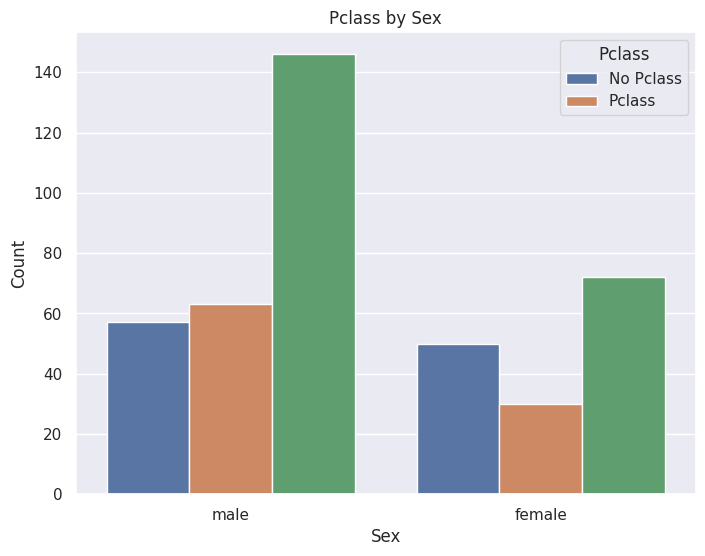

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Pclass', data=df)
plt.title('Pclass by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right', labels=['No Pclass', 'Pclass'])
plt.show()

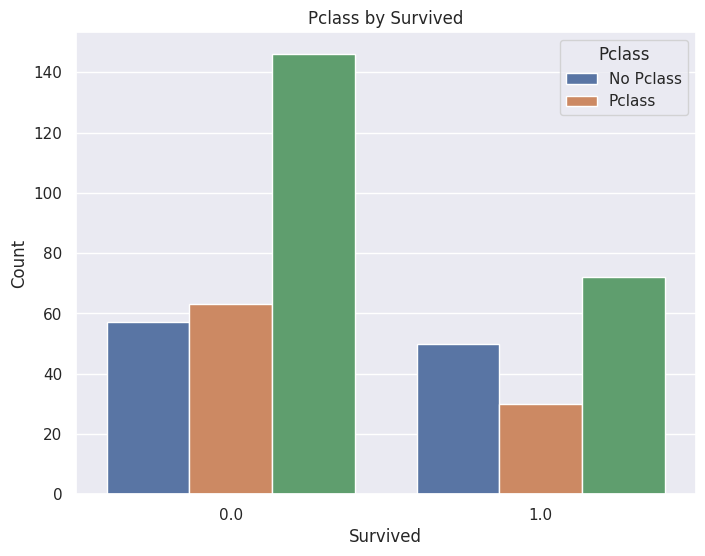

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Pclass by Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right', labels=['No Pclass', 'Pclass'])
plt.show()

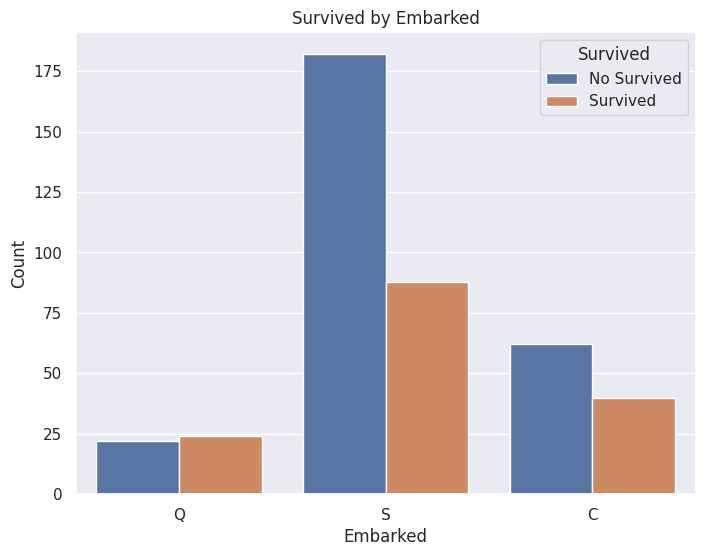

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survived by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No Survived', 'Survived'])
plt.show()

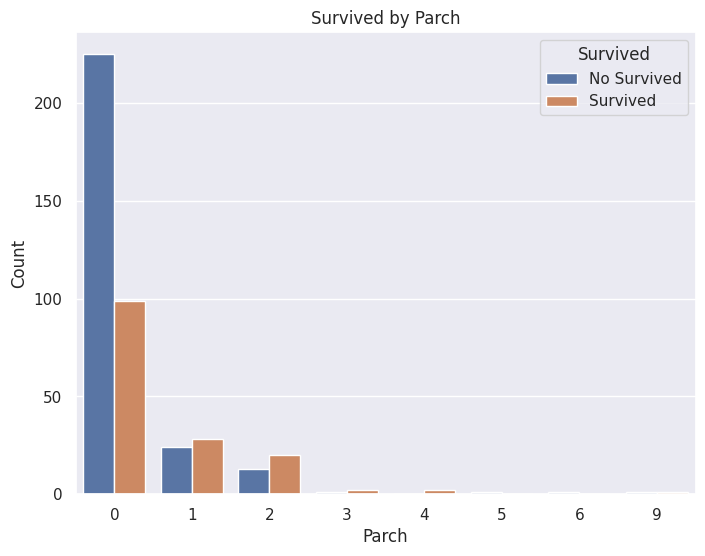

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survived by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No Survived', 'Survived'])
plt.show()

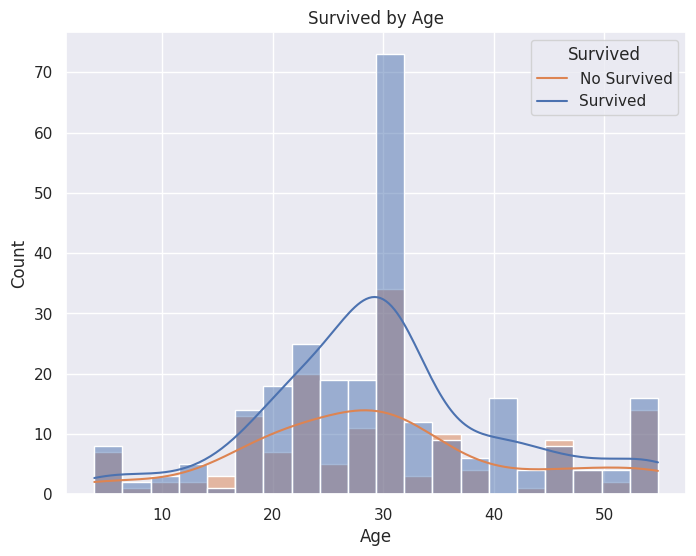

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=20)
plt.title('Survived by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No Survived', 'Survived'])
plt.show()

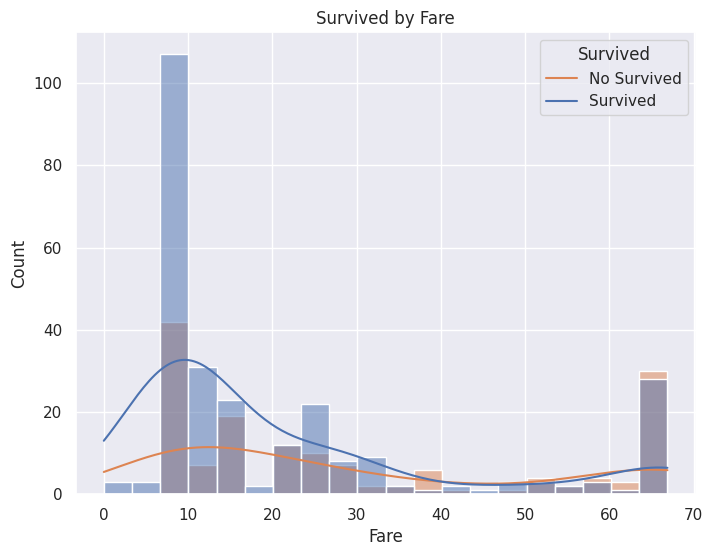

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=20)
plt.title('Survived by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No Survived', 'Survived'])
plt.show()

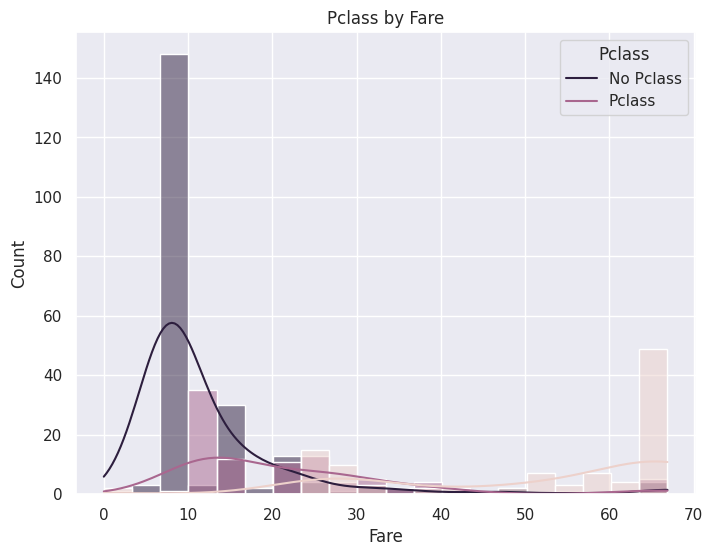

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fare', hue='Pclass', kde=True, bins=20)
plt.title('Pclass by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right', labels=['No Pclass', 'Pclass'])
plt.show()

<ipython-input-41-1f8db7c938a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

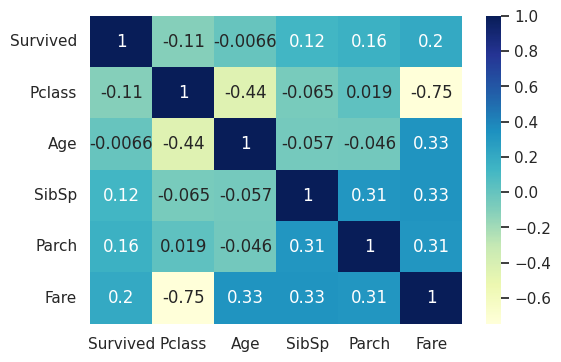

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
sns.pairplot(df,hue="species")
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"])
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

#### **Convert Categorical Data To Number**

In [ ]:
le = LabelEncoder()
df1 = df.copy()

select_col = df1.select_dtypes(include=["object"])

for i in select_col.columns:
  df1[i] = le.fit_transform(df1[i])

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1,34.500,0.0,0,7.8292,1
1,1.0,3.0,0,47.000,1.0,0,7.0000,2
2,0.0,2.0,1,54.875,0.0,0,9.6875,1
3,0.0,3.0,1,27.000,0.0,0,8.6625,2
4,1.0,3.0,0,22.000,1.0,1,12.2875,2


In [ ]:
df1.shape

(418, 8)

<ipython-input-133-ebbca1f50cb1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[variable], kde=True, bins=10)


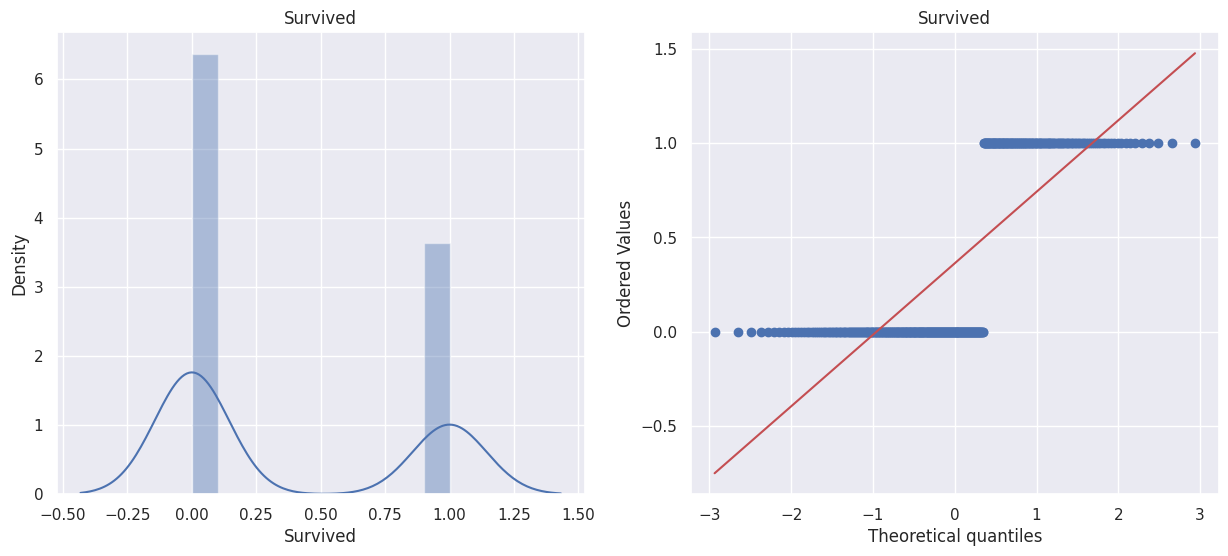

<ipython-input-133-ebbca1f50cb1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[variable], kde=True, bins=10)


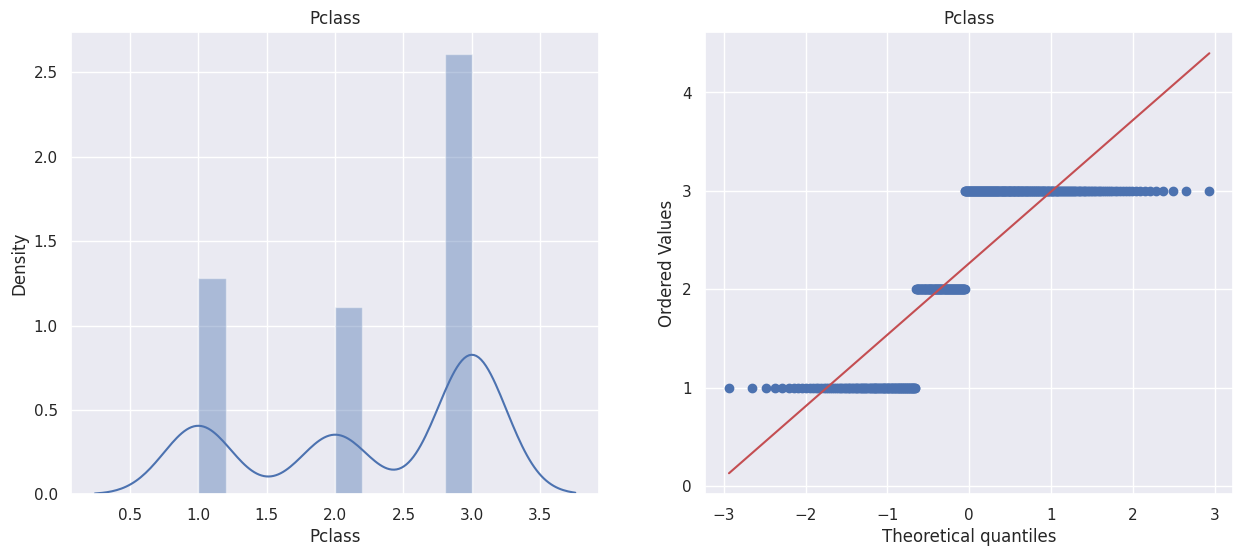

<ipython-input-133-ebbca1f50cb1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[variable], kde=True, bins=10)


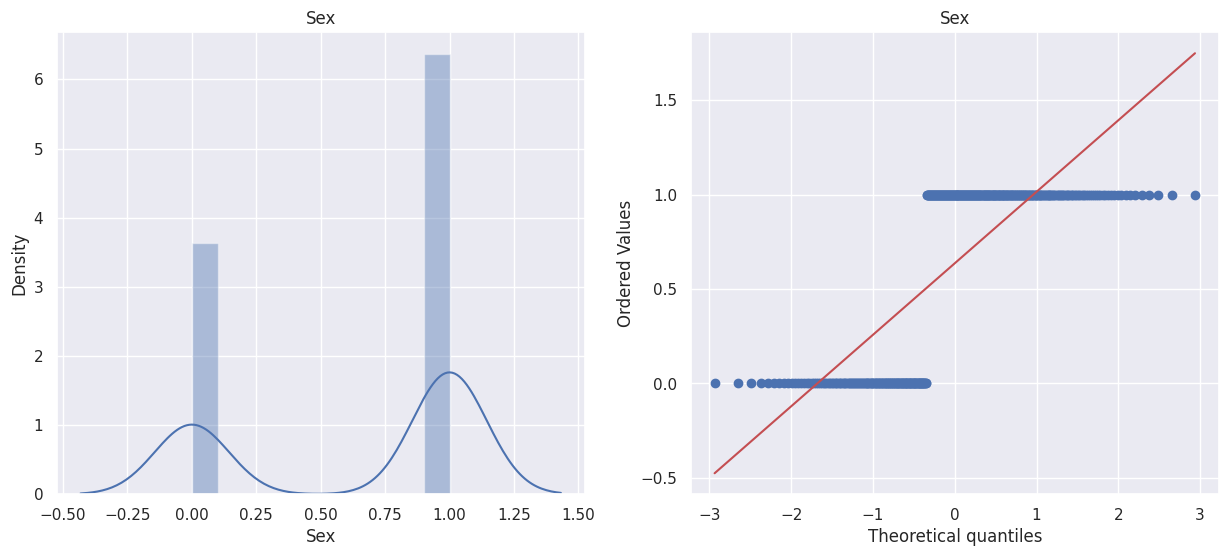

<ipython-input-133-ebbca1f50cb1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[variable], kde=True, bins=10)


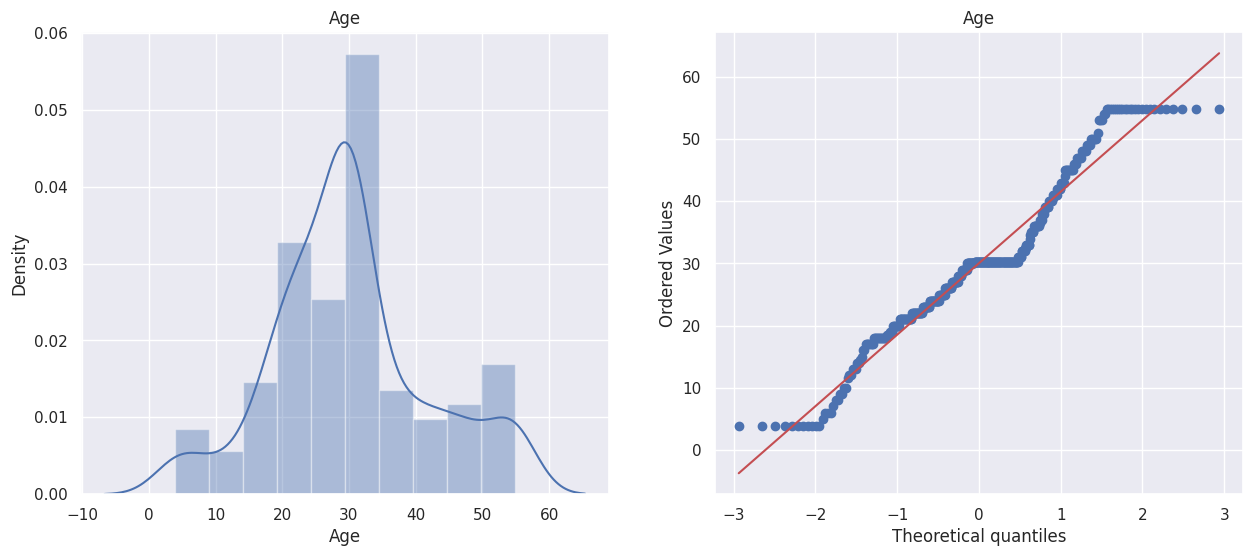

<ipython-input-133-ebbca1f50cb1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[variable], kde=True, bins=10)


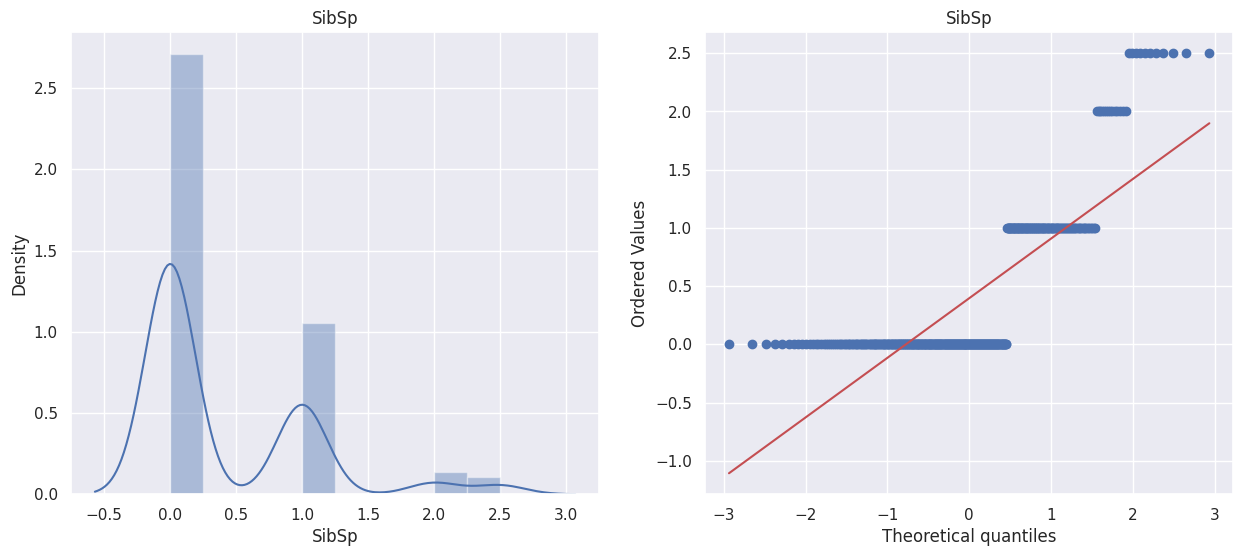

<ipython-input-133-ebbca1f50cb1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[variable], kde=True, bins=10)


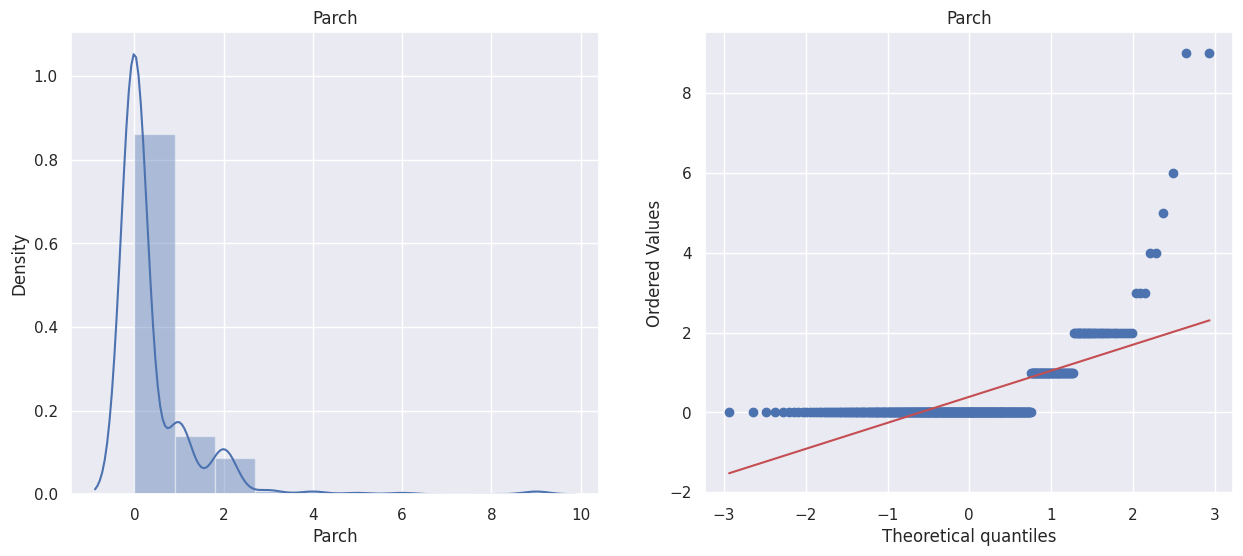

<ipython-input-133-ebbca1f50cb1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[variable], kde=True, bins=10)


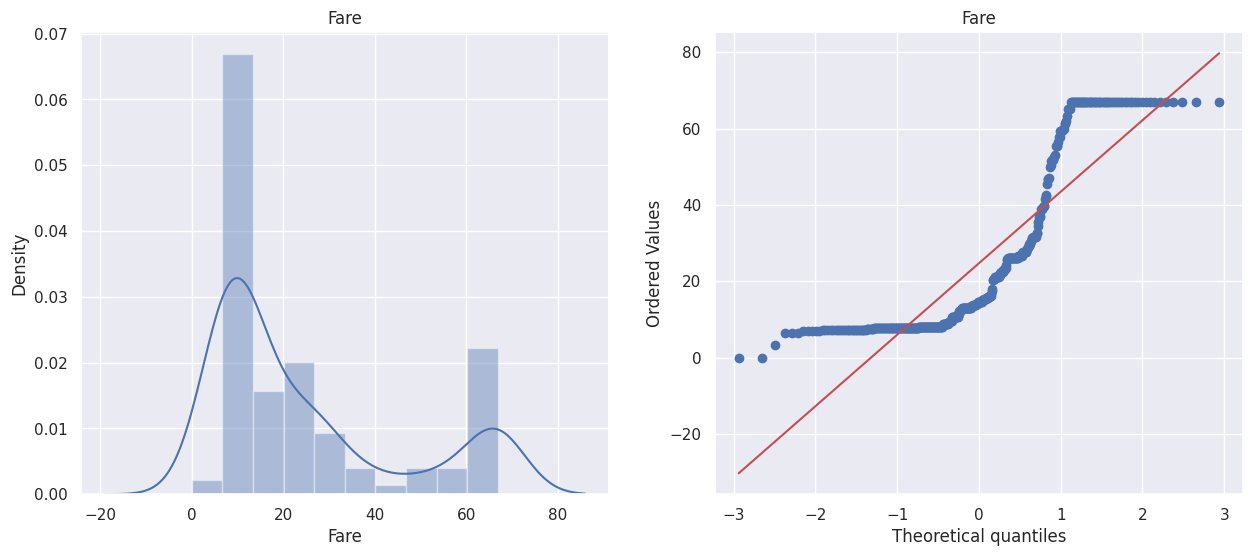

<ipython-input-133-ebbca1f50cb1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[variable], kde=True, bins=10)


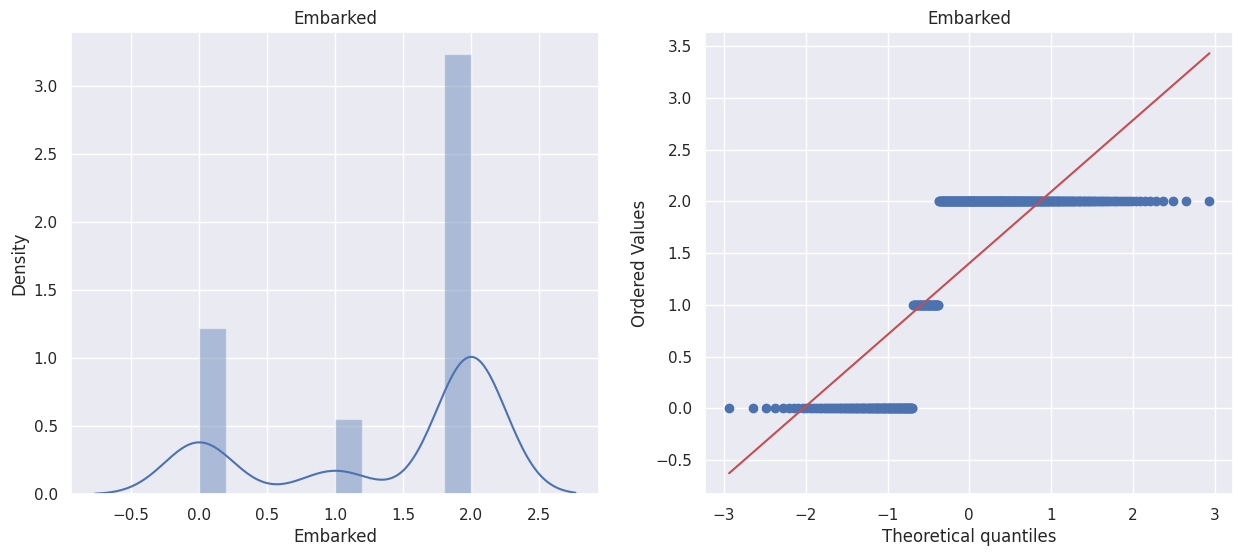

In [ ]:
def plots(df1, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #df1[variable].hist()
    sns.distplot(df1[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df1[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in df1.columns:
  plots(df1, i)

# **Feature Engineering**

#### **Mutual Information**

In [ ]:
X = df1.iloc[:,1:8]
Y = df1["Survived"]

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1,34.500,0.0,0,7.8292,1
1,3.0,0,47.000,1.0,0,7.0000,2
2,2.0,1,54.875,0.0,0,9.6875,1
3,3.0,1,27.000,0.0,0,8.6625,2
4,3.0,0,22.000,1.0,1,12.2875,2


In [ ]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

Embarked    0.000000
Pclass      0.005814
Parch       0.025367
SibSp       0.026938
Age         0.033287
Fare        0.045032
Sex         0.656680
dtype: float64

<Axes: >

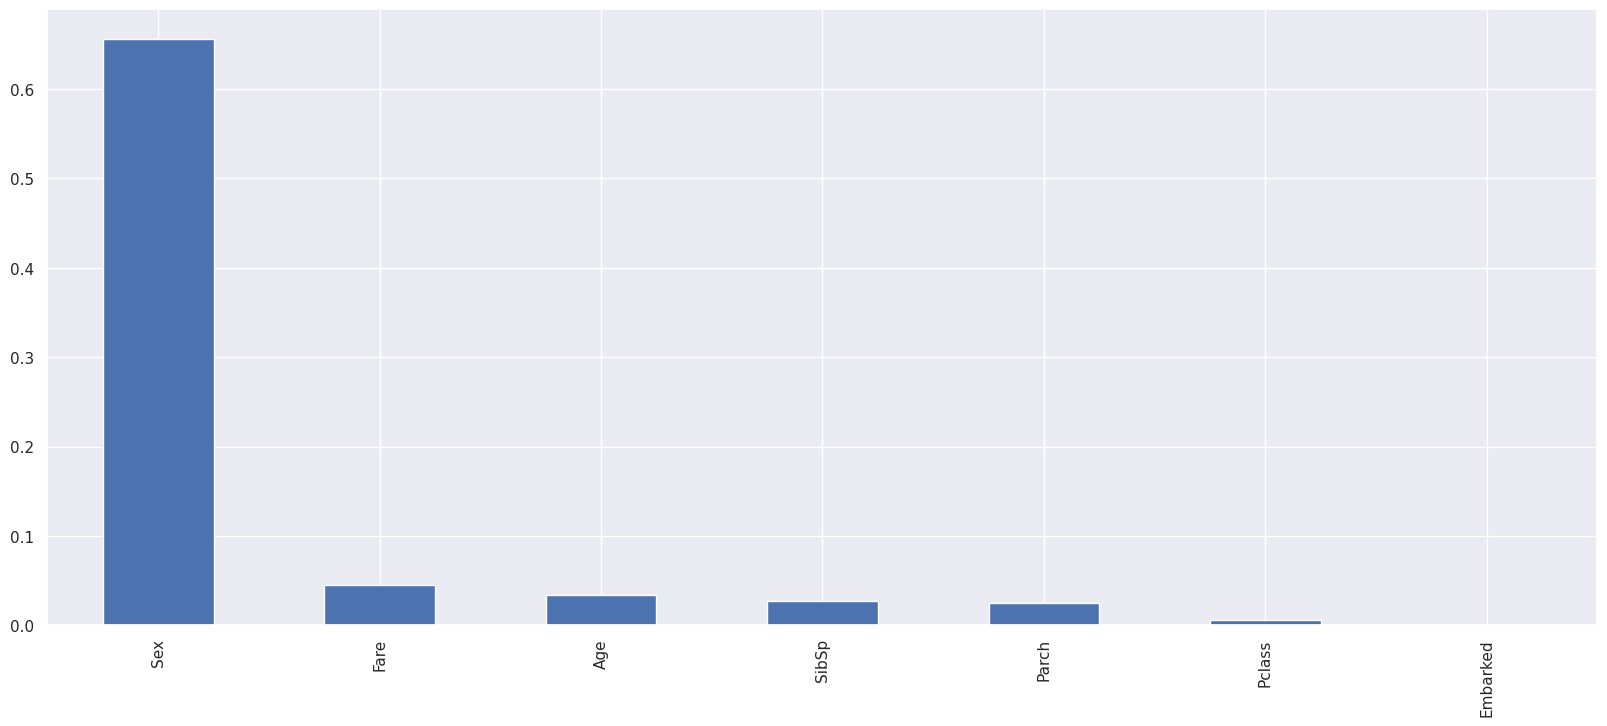

In [ ]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### **Splitting Data Into Train and Test**

In [ ]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (334, 7)
train_label :  (334,)
test_data :  (84, 7)
test_label :  (84,)


#### **Normalizing Data**

In [ ]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [ ]:
train_data_sc

array([[-1.49835483,  0.71506099,  2.03203907, ..., -0.40021756,
         1.6952408 , -1.65501353],
       [-1.49835483,  0.71506099, -0.00941596, ...,  1.52313013,
         2.05680888,  0.70223389],
       [-1.49835483,  0.71506099,  2.03203907, ...,  2.48480397,
         2.05680888, -1.65501353],
       ...,
       [ 0.8622608 , -1.39848211, -2.15345667, ...,  0.56145629,
        -0.36155906,  0.70223389],
       [ 0.8622608 ,  0.71506099,  0.01295513, ..., -0.40021756,
        -0.79266816, -0.47638982],
       [ 0.8622608 ,  0.71506099, -0.58389577, ..., -0.40021756,
        -0.49643118,  0.70223389]])

# **Model**

#### **Logistic Regression Model**

In [ ]:
model_lr = LogisticRegression()

In [ ]:
model_lr.fit(train_data_sc,train_label)

LogisticRegression()

In [ ]:
y_pred_1 = model_lr.predict(test_data_sc)
y_pred_1

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.])

In [ ]:
print("Train Data Accuracy :",(model_lr.score(train_data_sc,train_label)))
print("Test Data Accuracy :",(accuracy_score(y_pred_1,test_label)))

Train Data Accuracy : 1.0
Test Data Accuracy : 1.0


In [ ]:
confusion_matrix(y_pred_1,test_label)

array([[45,  0],
       [ 0, 39]])

In [ ]:
print(classification_report(y_pred_1,test_label))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



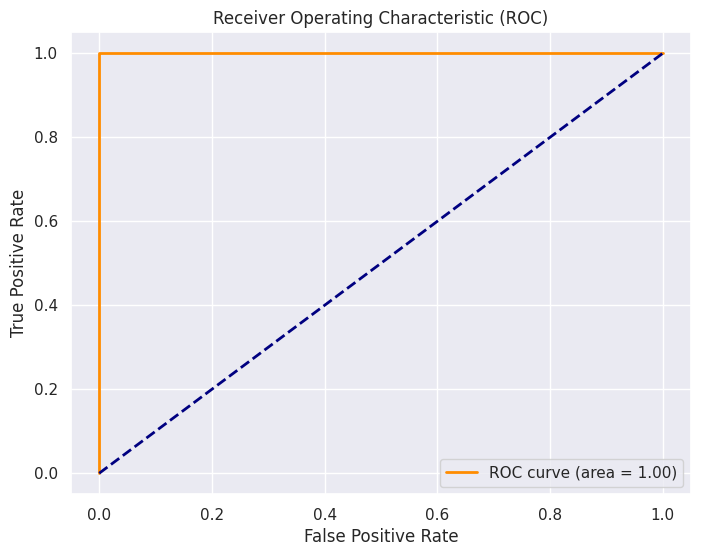

In [ ]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### **Random Forest model**

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
model_rf.fit(train_data_sc,train_label)

RandomForestClassifier()

In [ ]:
y_pred_2 = model_rf.predict(test_data_sc)

In [ ]:
print("Train Data Accuracy :",(model_rf.score(train_data_sc,train_label)))
print("Test Data Accuracy :",(accuracy_score(y_pred_2,test_label)))

Train Data Accuracy : 1.0
Test Data Accuracy : 1.0


In [ ]:
confusion_matrix(y_pred_2,test_label)

array([[45,  0],
       [ 0, 39]])

In [ ]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



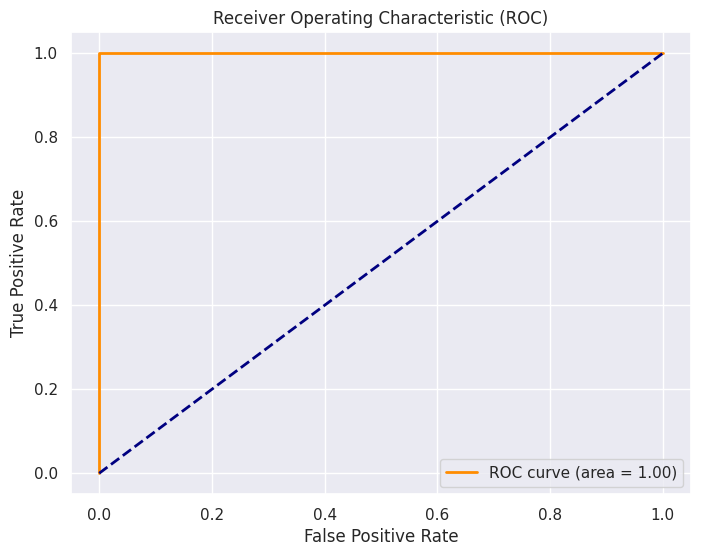

In [ ]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_2)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()